In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
# import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("phishing_site_urls.csv")

In [2]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [4]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [5]:
# This is a classification problem 
# See if the classes are balanced or imbalanced

#create a dataframe of classes counts

label_counts = pd.DataFrame(df.Label.value_counts())

c:\users\epoch\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Label'>

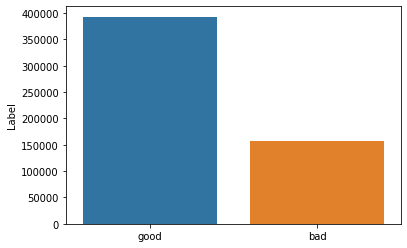

In [6]:
#visualizing target_col

import seaborn as sns

sns.barplot(label_counts.index,label_counts.Label)

In [7]:
# Splitting words in url using tokenizer

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [8]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [9]:
# this will be pull letter which matches to expression

tokenizer.tokenize(df.URL[0]) # using first row only

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [10]:
import time # calculate time 

print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 4.154023799999997 sec


In [11]:
df.sample(5)

,URL,Label,text_tokenized
410085,ooracing.com/store/index.php?act=viewProd&prod...,good,"[ooracing, com, store, index, php, act, viewPr..."
541162,ledherspeut.com/zapoy/gate.php,bad,"[ledherspeut, com, zapoy, gate, php]"
540467,185.36.102.105/upd/60/,bad,[upd]
98567,go890.com/d/x86.dll,bad,"[go, com, d, x, dll]"
261604,wn.com/adoption?orderby=published,good,"[wn, com, adoption, orderby, published]"


In [12]:
from nltk.stem.snowball import SnowballStemmer # stemmes words

stemmer = SnowballStemmer("english")

In [13]:
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 84.46578600000001 sec


In [14]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed
339010,flickr.com/photos/army_arch/2610669262/,good,"[flickr, com, photos, army, arch]","[flickr, com, photo, armi, arch]"
240564,solarenergy.einnews.com/news/brightsource-ener...,good,"[solarenergy, einnews, com, news, brightsource...","[solarenergi, einnew, com, news, brightsourc, ..."
270337,airbagit.com/,good,"[airbagit, com]","[airbagit, com]"
243181,staugustine.com/sports/2011-09-28/former-flori...,good,"[staugustine, com, sports, former, florida, st...","[staugustin, com, sport, former, florida, star..."
286547,azcentral.com/sports/rattlers/articles/2011/04...,good,"[azcentral, com, sports, rattlers, articles, a...","[azcentr, com, sport, rattler, articl, afl, ar..."


In [15]:
# Joining all the stemmmed words.

print('Get joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.4143808999999976 sec


In [16]:
#slicing classes

bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [17]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [18]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [19]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium import webdriver

browser = webdriver.Chrome(r"C:\Users\Epoch\Downloads\chromedriver_win32 (2)\chromedriver.exe")

In [20]:
list_urls = ["https://www.creativedock.com/", "https://www.creativedock.com/about-us"] #here i take phishing sites 
links_with_text = []

In [21]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

In [22]:
df1 = pd.DataFrame(links_with_text, columns=["from", "to"])

In [23]:
df1.head()

,from,to
0,https://www.creativedock.com/,https://www.creativedock.com
1,https://www.creativedock.com/,https://www.creativedock.com/about-us
2,https://www.creativedock.com/,https://www.creativedock.com/projects
3,https://www.creativedock.com/,http://creativedock.medium.com
4,https://www.creativedock.com/,https://www.creativedock.com/contact


In [24]:
#Creating model
# transform a given text into a vector on the basis of count of each word

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [25]:
#transform all text which we tokenized and stemed

feature = cv.fit_transform(df.text_sent) 

In [26]:
# convert sparse matrix into array to print transformed features

feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# Splitting data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, df.Label)

In [28]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [29]:
lr.fit(X_train, y_train)

c:\users\epoch\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
lr.score(X_test, y_test)

0.9652315108091775

In [31]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(X_test,y_test),2)

In [35]:
# Getting training and testing accuracy

from sklearn.metrics import confusion_matrix

print('Training Accuracy :',lr.score(X_train,y_train))
print('Testing Accuracy :',lr.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])



Training Accuracy : 0.9789737602819356
Testing Accuracy : 0.9652315108091775


In [36]:
from sklearn.metrics import classification_report 

print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(X_test), y_test,
                            target_names =['Bad','Good']))



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36743
        Good       0.99      0.96      0.98    100594

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337



CONFUSION MATRIX


<AxesSubplot:>

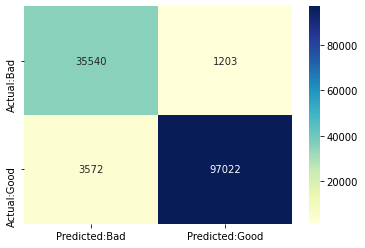

In [37]:
print('CONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [38]:
#MultinomialNB

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [39]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [40]:
mnb.score(X_test,y_test)

0.9578336500724495

In [41]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(X_test,y_test),2)

In [42]:
print('Training Accuracy :',mnb.score(X_train,y_train))
print('Testing Accuracy :',mnb.score(X_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(X_test), y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


Training Accuracy : 0.9739544524512814
Testing Accuracy : 0.9578336500724495


In [43]:
print('CLASSIFICATION REPORT')
print(classification_report(mnb.predict(X_test), y_test,
                            target_names =['Bad','Good']))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

         Bad       0.91      0.94      0.93     38189
        Good       0.98      0.97      0.97     99148

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337



In [44]:
# SVM

from sklearn import svm
clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
mnb.score(X_test,y_test)